# <center style="color:red;font-weight:bold;">Music Genre Prediction</center>

<center><img src="music_genre.jpg" width=50%></center>

Import required libraries

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading

In [183]:
music = pd.read_csv("music_genre.csv")
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [184]:
music.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

Statistical Summary of the dataframe

In [185]:
music.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


Datatypes of each columns

In [186]:
music.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

Missing values in each columns

In [187]:
music.isna().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

### <font color="red"> Feature Engineering

In [188]:
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


Removing unwanted columns

In [189]:
music.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [190]:
unwanted_cols = ['instance_id', 'obtained_date', 'artist_name', 'track_name', 'tempo', "mode"]
music = music.drop(columns=unwanted_cols)
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,0.0748,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,0.0300,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,0.0345,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,0.2390,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,0.0413,0.323,Electronic


In [191]:
music.shape

(50005, 12)

Selecting Numerical and Categorical Features

* Handle missing values in numerical features

In [192]:
from sklearn.impute import SimpleImputer

# select numeric features
numeric = music.select_dtypes(include=["float"])
num_cols = numeric.columns
# imputer
n_impute = SimpleImputer(strategy="mean")

# imputing missing values
data = n_impute.fit_transform(numeric)
numerical_df = pd.DataFrame(data, columns=num_cols)

# display imputed df
numerical_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,0.759
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,0.531
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,0.333
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,0.270
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,0.323


* Handle missing values in Categorical features

In [193]:
# select categorical features
categoric = music.select_dtypes(include=["object"])
cat_cols = categoric.columns

# imputer
c_impute = SimpleImputer(strategy="most_frequent")

# imputing missing values
data = c_impute.fit_transform(categoric)
categoric_df = pd.DataFrame(data, columns=cat_cols)

# display imputed df
categoric_df.head()

,key,music_genre
0,A#,Electronic
1,D,Electronic
2,G#,Electronic
3,C#,Electronic
4,F#,Electronic


Merging the imputed Categorical and Numerical features

In [194]:
df = pd.concat([numerical_df, categoric_df], axis=1)
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,key,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,0.759,A#,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,0.531,D,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,0.333,G#,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,0.270,C#,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,0.323,F#,Electronic


Selecting Features and Target variables

In [195]:
features = df.drop("music_genre", axis=1)
target = df[["music_genre"]]

Categorical Feature Encoding - One-Hot Encoder

In [196]:
encoded_cat = pd.get_dummies(categoric_df)
encoded_cat.head()

,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,...,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


Feature Scaling - Numerical features

* *Robust Scaler* -> robust to outliers.

In [197]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_data = scaler.fit_transform(numerical_df)
robust_numbericdf = pd.DataFrame(scaled_data, columns=num_cols)
robust_numbericdf.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
0,-0.818182,-0.261929,0.342857,-2.337914,0.780105,5.108658,-0.074779,0.365107,0.415064,0.795396
1,-0.636364,-0.246851,0.220408,-0.010661,0.646597,6.128013,-0.013596,0.041154,-0.302885,0.212276
2,-0.772727,-0.264975,0.212245,-0.039233,0.293194,0.075110,2.773623,0.467816,-0.230769,-0.294118
3,-0.500000,-0.222974,0.840816,-0.558833,0.149215,0.015303,0.210741,0.488744,3.046474,-0.455243
4,-0.590909,-0.261985,0.285714,0.032794,-0.146597,5.863497,0.210741,0.177805,-0.121795,-0.319693


Combining Encoded Numerical and Categorical features

In [198]:
X = pd.concat([encoded_cat, robust_numbericdf], axis=1)
X.head()

,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,...,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
0,0,1,0,0,0,0,0,0,0,0,...,-0.818182,-0.261929,0.342857,-2.337914,0.780105,5.108658,-0.074779,0.365107,0.415064,0.795396
1,0,0,0,0,0,1,0,0,0,0,...,-0.636364,-0.246851,0.220408,-0.010661,0.646597,6.128013,-0.013596,0.041154,-0.302885,0.212276
2,0,0,0,0,0,0,0,0,0,0,...,-0.772727,-0.264975,0.212245,-0.039233,0.293194,0.075110,2.773623,0.467816,-0.230769,-0.294118
3,0,0,0,0,1,0,0,0,0,0,...,-0.500000,-0.222974,0.840816,-0.558833,0.149215,0.015303,0.210741,0.488744,3.046474,-0.455243
4,0,0,0,0,0,0,0,0,0,1,...,-0.590909,-0.261985,0.285714,0.032794,-0.146597,5.863497,0.210741,0.177805,-0.121795,-0.319693


Encoding Target Variable

In [199]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encode the target variable
y = le.fit_transform(target)
y = pd.DataFrame(y, columns=target.columns)

c:\Users\asusa\anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [200]:
y.head()

,music_genre
0,5
1,5
2,5
3,5
4,5


Splitting the Dataset into Train and Test sets

In [201]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (40004, 32)
y_train shape:  (40004, 1)
x_test shape:  (10001, 32)
y_test shape:  (10001, 1)


## <font color="red"> Classification Algorithms

* K-Nearest Neighbors

* Logistic Regression

* Support Vector Machine

### 1. K-Nearest Neighbors

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

# Make a prediction
knn_pred = knn.predict(x_test)

print("Actual Labels:", y_test[:10])
print("Predicted Labels:", knn_pred[:10])

c:\Users\asusa\anaconda3\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Actual Labels:        music_genre
25276            8
9478             1
28957            8
49429            6
34374            2
11262            7
23162            4
9887             1
16368            0
32617            2
Predicted Labels: [8 1 8 6 2 7 4 1 0 2]


Accuracy of the K-Nearest Neighbors

In [203]:
knn_acc = round(accuracy_score(y_test, knn_pred), 4)

print("K-Nearest Neighbors Accuracy:", knn_acc)

K-Nearest Neighbors Accuracy: 0.9821


### 2. Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

print("Actual Labels:", y_test[:10])
print("Predicted Labels:", lr_pred[:10])

c:\Users\asusa\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Actual Labels:        music_genre
25276            8
9478             1
28957            8
49429            6
34374            2
11262            7
23162            4
9887             1
16368            0
32617            2
Predicted Labels: [8 1 8 6 2 7 4 1 0 2]


### 2. Accuracy of Logistic Regression

In [205]:
from sklearn.metrics import accuracy_score

lr_acc = round(accuracy_score(y_test, lr_pred), 4)

print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 1.0


### 3. Support Vector Machines

In [206]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(x_train, y_train)

# Make a prediction
svm_pred = svm.predict(x_test)

print("Actual Labels:", y_test[:10])
print("Predicted Labels:", svm_pred[:10])

c:\Users\asusa\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Actual Labels:        music_genre
25276            8
9478             1
28957            8
49429            6
34374            2
11262            7
23162            4
9887             1
16368            0
32617            2
Predicted Labels: [8 1 8 6 2 7 4 1 0 2]


### Accuracy of K-Nearest Neighbors

In [207]:
svm_acc = round(accuracy_score(y_test, svm_pred), 4)

print("Support Vector Machines(SVM) Accuracy:", svm_acc)

Support Vector Machines(SVM) Accuracy: 0.9995


### <font color="red"> Creating with Pipeline

In [208]:
features.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,key
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,0.759,A#
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,0.531,D
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,0.333,G#
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,0.270,C#
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,0.323,F#


In [209]:
# Numeric columns
numeric_cols = features.select_dtypes(include=["float64"]).columns
print(numeric_cols)

# categorical columns
categoric_cols = features.select_dtypes(include=["object"]).columns
print(categoric_cols)

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'],
      dtype='object')
Index(['key'], dtype='object')


Creating Pre-processing Pipeline

In [210]:
from sklearn.pipeline import Pipeline

# preprocessing for numeric columns
num_transformer = Pipeline(steps=
    [
        ("imputeN", SimpleImputer(strategy="mean")),
        ("scaler", RobustScaler())
    ]
)

num_transformer

Pipeline(steps=[('imputeN', SimpleImputer()), ('scaler', RobustScaler())])

In [211]:
from sklearn.preprocessing import OneHotEncoder

# preprocessing for categoric columns
cat_transformer = Pipeline(steps=
                           [
                               ("imputeC", SimpleImputer(strategy="most_frequent")),
                               ("onehot", OneHotEncoder(handle_unknown='ignore'))
                           ])

cat_transformer


Pipeline(steps=[('imputeC', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Applying Transformer

In [212]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=
    [
        ("categoric", cat_transformer, categoric_cols),
        ("numeric", num_transformer, numeric_cols)
    ]
)

preprocessing

ColumnTransformer(transformers=[('categoric',
                                 Pipeline(steps=[('imputeC',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['key'], dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('imputeN', SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'],
      dtype='object'))])

Add estimator to the pipeline

In [213]:
from sklearn.neighbors import KNeighborsClassifier

# create knn model
knn_estimator = KNeighborsClassifier()

knn_model = Pipeline(steps=
                     [
                         ("preprocessing", preprocessing),
                         ("estimator", knn_estimator)
                     ])

knn_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['key'], dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'],
      dtype='object'))])),
                ('estimator', KNeighborsClassifier())])

Train Pipeline model

In [214]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, stratify=target)

In [215]:
from sklearn import set_config

# train pipeline model
set_config(display="diagram")
knn_model.fit(X_train, Y_train)

c:\Users\asusa\anaconda3\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['key'], dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'],
      dtype='object'))])),
                ('estimator', KNeighborsClassifier())])

Confusion Matrix - K-Nearest Classifier

In [216]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title, color):
    
    plt.figure(figsize=(14, 12))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap=color)

    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    
    plt.show()

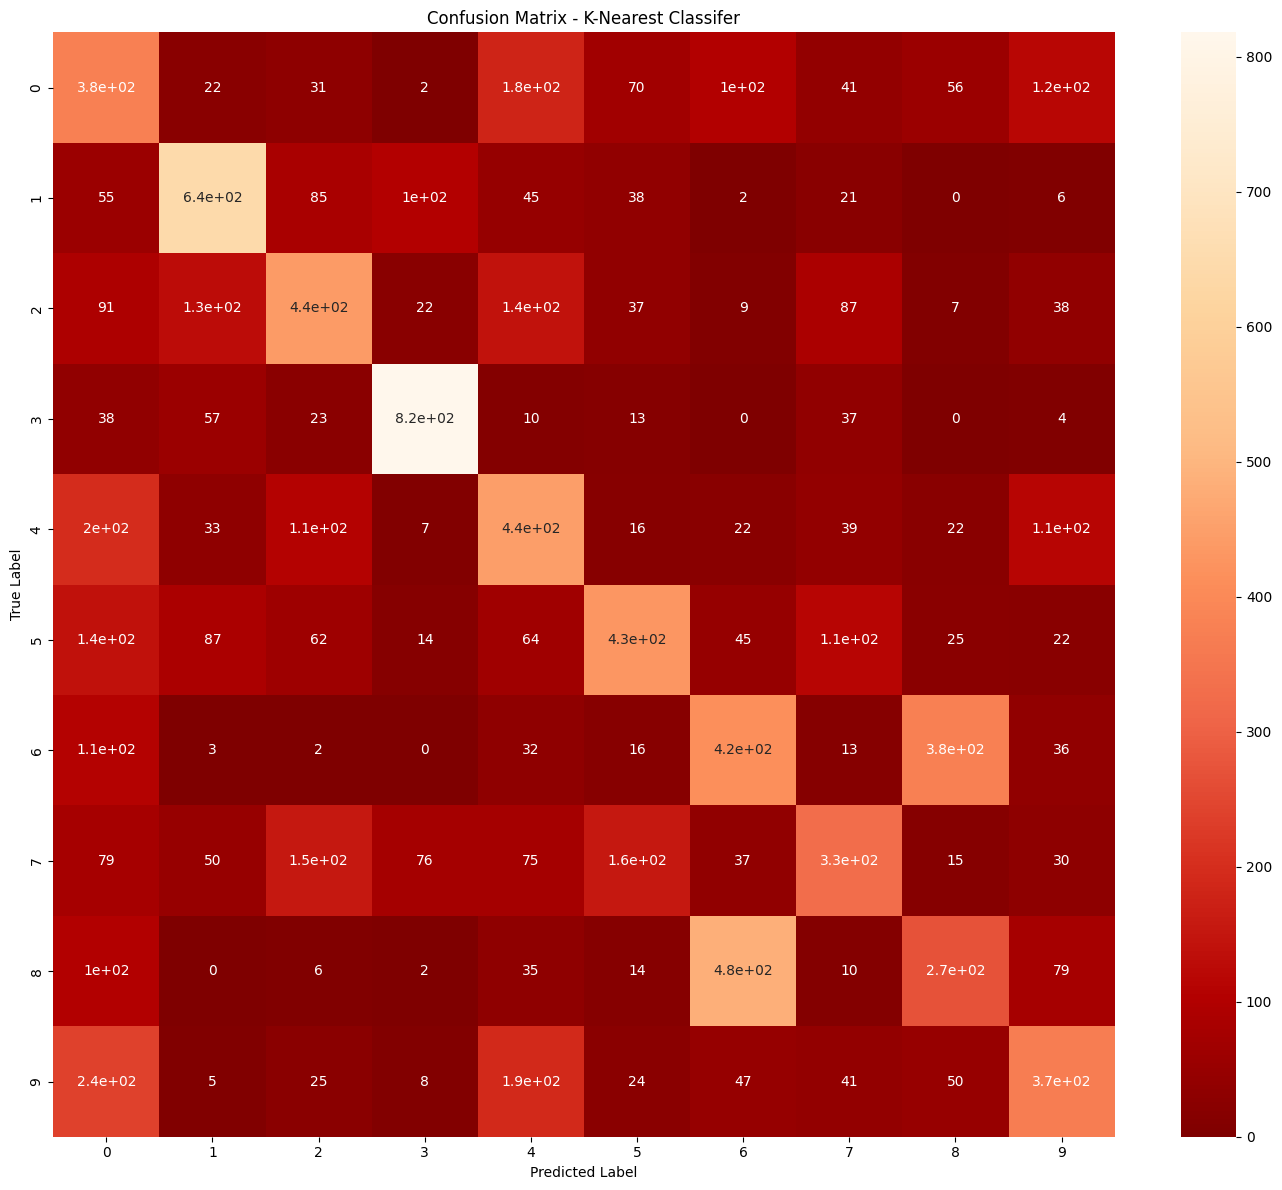

In [217]:
plot_confusion_matrix(Y_test, knn_model.predict(X_test), "Confusion Matrix - K-Nearest Classifer", "OrRd_r")

In [218]:
from sklearn.metrics import classification_report, recall_score, f1_score, precision_score, confusion_matrix
import seaborn as sns

In [222]:
# Make a prediction
y_pred = knn_model.predict(X_test)

# Summarize the fit of the model
report = classification_report(Y_test, y_pred)
print(report)

plt.show()

              precision    recall  f1-score   support

 Alternative       0.26      0.38      0.31      1001
       Anime       0.63      0.65      0.64      1000
       Blues       0.47      0.44      0.45      1000
   Classical       0.78      0.82      0.80      1000
     Country       0.36      0.45      0.40      1000
  Electronic       0.53      0.43      0.47      1000
     Hip-Hop       0.36      0.41      0.38      1000
        Jazz       0.45      0.33      0.38      1000
         Rap       0.33      0.27      0.30      1000
        Rock       0.45      0.37      0.41      1000

    accuracy                           0.45     10001
   macro avg       0.46      0.45      0.45     10001
weighted avg       0.46      0.45      0.45     10001



### Saving the Trained Models

In [223]:
# importing model saving library
import pickle

# save the knn model
knn_pickle = open("knn_Model_Classifer.pickle", "wb")